# Logistic Regression: Klassifikation und Wahrscheinlichkeit

Die logistische Regression ist ein Modell für Regressionsanalyse, bei der die abhängige Variable kategorisch ist. Dieses Modell kann zur Klassifikation verwendet werden und liefert auch die Wahrscheinlichkeit, ob eine Stichprobe zur ausgewählten Klasse gehört. Die Formel ist wie bei der linearen Regression: y = w0 + w1*x1 + w2*x2 + etc. +wn*xn

Die logistische Funktion ist als 1 / 1 + e^-z definiert, wobei e die Eulersche Zahl (~2,71828…) ist.

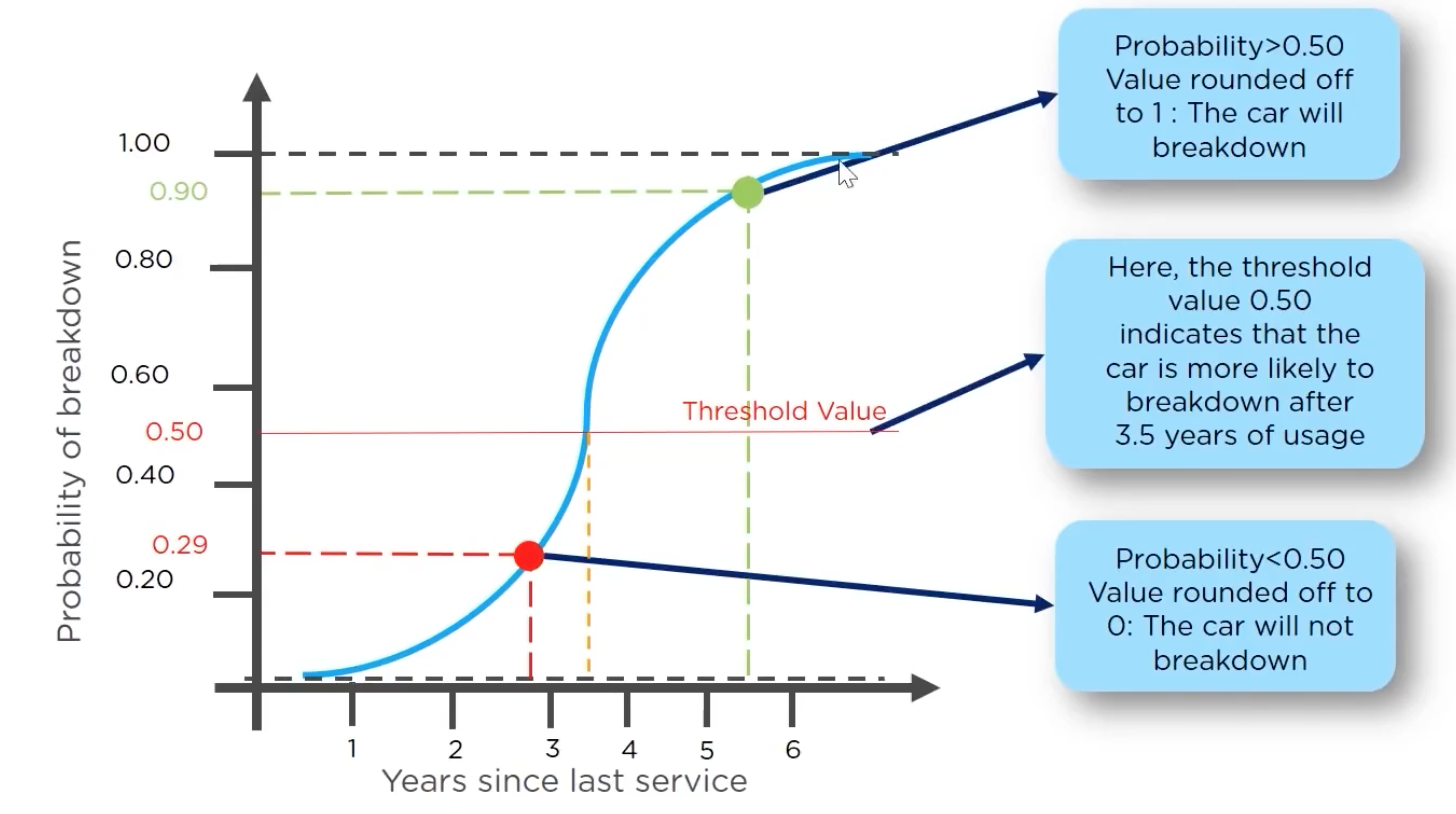

In [2]:
from IPython.display import Image
Image("./logreg.png")

Zwar wird hier eine Kurve gezeichnet, wie auch bei der Linearen Regression, aber die Platzierung der Prediction deutet auf eine kategorische Lösung hin: z.B. ich will wissen, ob mein Auto liegen bleibt, wenn ich es über Jahre ohne Reparatur verwende. Ab Jahr 3,5 ist die Wahrscheinlichkeit, dass das passiert bei +50%

# Datenvergleich: Logistic vs. Linear   

0 = p/1-p : Die Möglichkeit, dass etwas eintrifft, durch die Möglichkeit, dass etwas nicht eintrifft.

Da es in logistischer Regression nur Ja oder Nein - 1 oder 0 gibt, verteilen sich die Daten dementsprechend. Bei den Extremwerten verlaufen die Werte Horizontal (voll 1 oder voll 0), ansonsten liegen sie im Wahrscheinlichkeitsraum dazwischen. 

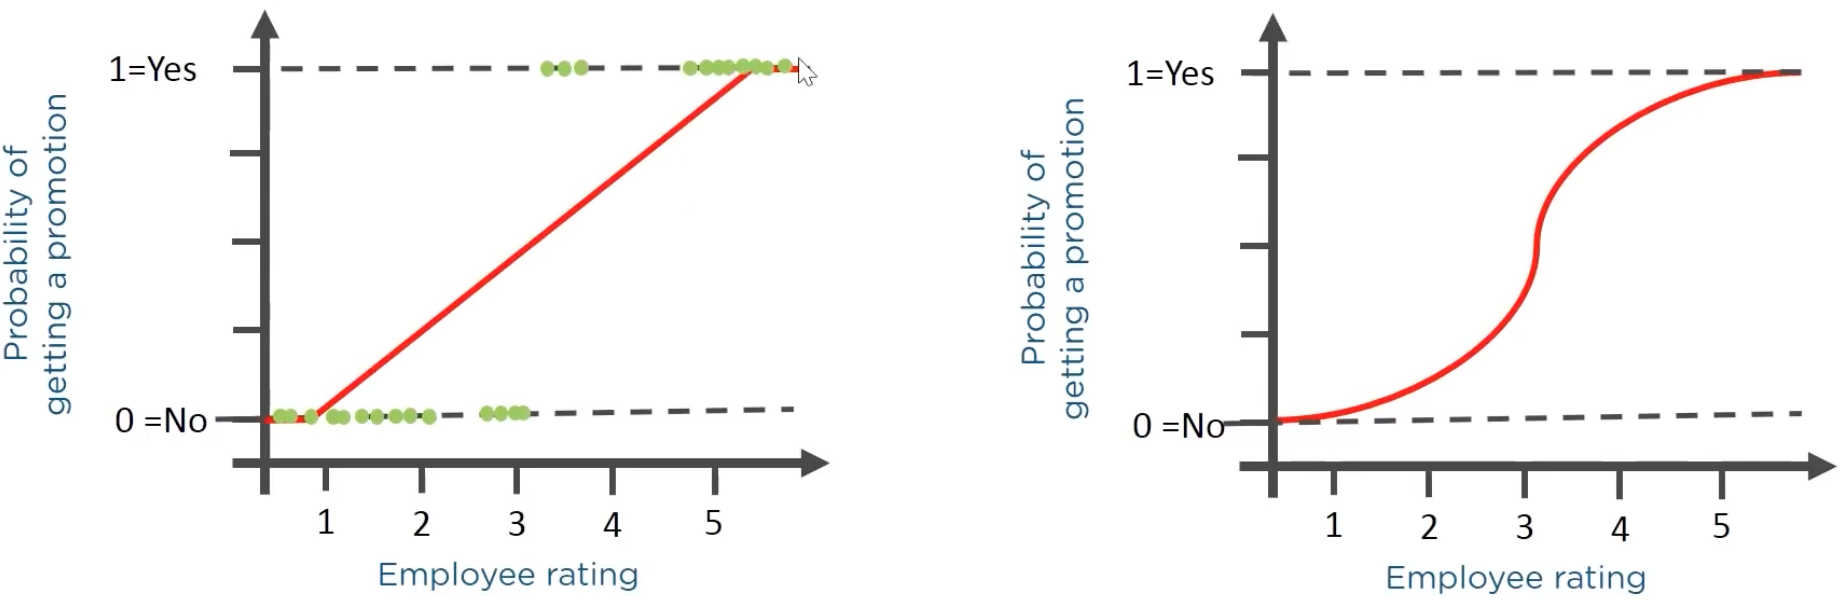

In [5]:
Image("./loglin.png") 

# Beispiel: Zahlen Identifikation

Dokumentation des Beispiels: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [34]:
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


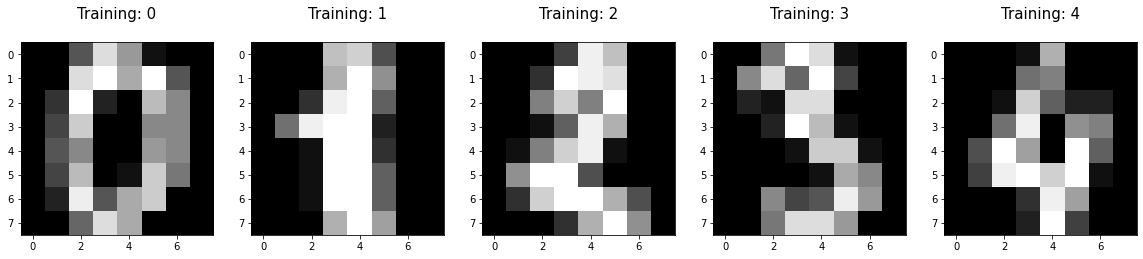

In [44]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 15)

Das Modell erkennt in diesen 8x8 Pixeln ein Muster(Weiße Flächen vs. Graue/Schwarze). Dieses Muster wird Zahlen zugeordnet, je mehr beispiele es hat, desto präziser. Es fragt jeweils danach "Ist es eine 0 oder nicht?" "Wenn es keine Null ist, ist es eine 1?" usw. Die Klassifizierung wird mithilfe der Beispiele zu einer Wahrscheinlichkeit.

# Model Building

In [14]:
#dataset in testset und trainingsset einteilen (75% Trainingsdaten, 25% Testdaten, random state=welche Zufallsbeispiele)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [22]:
# all parameters not specified are set to their defaults, solver ist der algorithmus, max_iter sind die iterationen
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=2000)

In [23]:
#model trainieren
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [24]:
#predict den output des ersten elements aus dem test set
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[2]


In [25]:
#predicted den output der ersten 10 elemente
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

# Model aktivieren und evaluieren

In [26]:
#nun das model auf das gesammte data set anwenden
predictions = logisticRegr.predict(x_test)

In [27]:
#accuracy wird ausgegeben, bei ca. 95%
score = logisticRegr.score(x_test, y_test)
score

0.9533333333333334

# Visualisieren

In [42]:
#confusion matrix ohne graphische visualisierung
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


Text(0.5, 1.0, 'Accuracy: 0.9533333333333334')

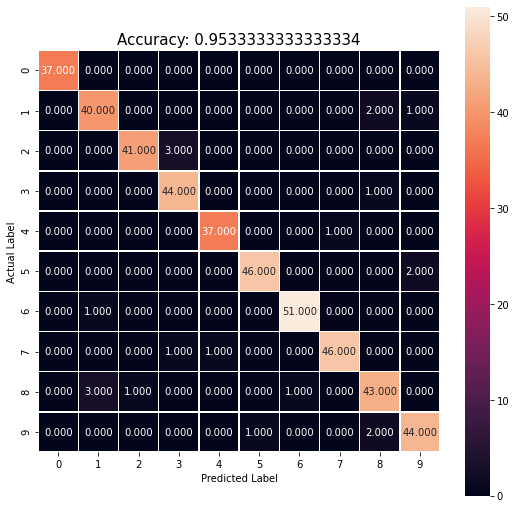

In [43]:
#seaborn heatmap aus der confusion matrix machen
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt='.3f', linewidths=.5, square = True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = f'Accuracy: {score}'
plt.title(all_sample_title, size = 15)

Die Diagonale zeigt uns jeweils die richtige Lösung und die Anzahl der richtigen Prädiktionen an. So wurde die Zahl 9 in 44 Beispielen richtig kategorisiert und in 2 Fällen als 8 und in einem als 5 missverstanden.

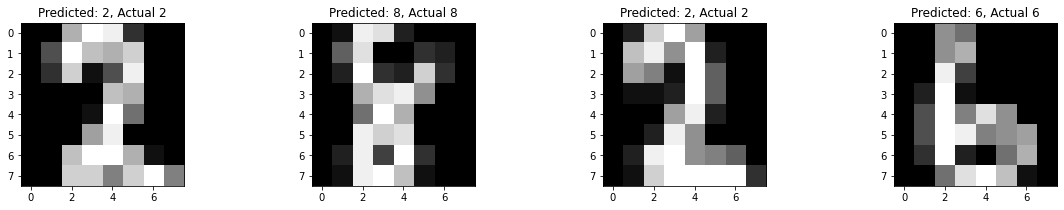

In [56]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict ==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize = (20,3))
for Index, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, Index +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title(f'Predicted: {predictions[wrong]}, Actual {y_test[wrong]}')